Compare the three models:
Create a new notebook (CompareModels.ipynb)
Load the 3 models.
Make a plot comparing the 3 ROC curves of the 3 models on the validation dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

Found 39 images belonging to 6 classes.
2/2 [==============================] - 5s 409ms/step


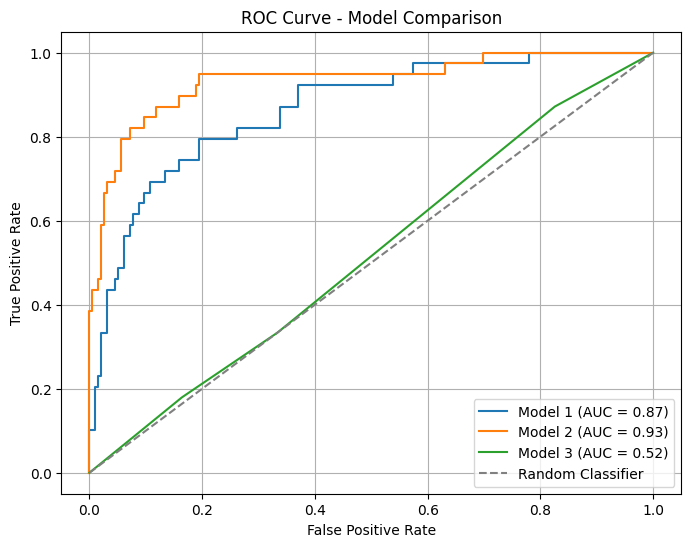

In [17]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load the saved models
model_paths = ["/content/drive/MyDrive/Train-2.h5", "/content/drive/MyDrive/Train-1.ipynb.h5", "/content/drive/MyDrive/Train-3.h5"]
models = [load_model(path) for path in model_paths]

# Define the path to my validation directory
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'

# Define image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Create an ImageDataGenerator for validation data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Make predictions for each model
predictions = [model.predict(validation_generator) for model in models]

# Define the number of classes in my dataset
num_classes = 6

# Convert multiclass labels to binary format for each class individually
binary_labels = np.zeros((len(validation_generator.classes), num_classes))
for i in range(num_classes):
    binary_labels[:, i] = (validation_generator.classes == i).astype(int)

# Calculate ROC curve and AUC for each model
all_fpr, all_tpr, all_auc = [], [], []
for prediction in predictions:
    fpr, tpr, _ = roc_curve(binary_labels.ravel(), prediction.ravel())
    roc_auc = auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for i in range(len(models)):
    plt.plot(all_fpr[i], all_tpr[i], label=f'Model {i+1} (AUC = {all_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


Comments/Conclusion:

Model 1(VGG16): AUC of 0.87

This indicates that Model 1 has good discrimination ability, with a relatively high AUC value close to 1.0. It performs well in distinguishing between the positive and negative classes.

Model 2(Xception): AUC of 0.93

Model 2 has a higher AUC value compared to Model 1, suggesting even better discrimination ability. It performs better than Model 1 in separating the classes, indicating superior performance.

Model 3(EfficientNetB0): AUC of 0.52

The AUC value for Model 3 is close to 0.5, which indicates poor discrimination ability. This suggests that Model 3 performs similarly to a random classifier and may not be effective in distinguishing between the classes.

In summary, Model 2(Xception) appears to be the best-performing model among the three, with the highest AUC value, followed by Model 1. Model 3, with an AUC close to 0.5, shows poor performance in class separation.